From https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import fashion_mnist

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

Load the dataset

In [5]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Basic Autoencoder

In [10]:
latent_dim = 64

In [17]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28,28))
        ])
            
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [18]:
autoencoder = Autoencoder(latent_dim)

In [19]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [20]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0238 - val_loss: 0.0133
Epoch 2/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0116 - val_loss: 0.0105
Epoch 3/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0099 - val_loss: 0.0098
Epoch 4/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0089 - val_loss: 0.0091
Epoch 8/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
60000/60000 [==============================] - 10s 172us/sample - l

In [21]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

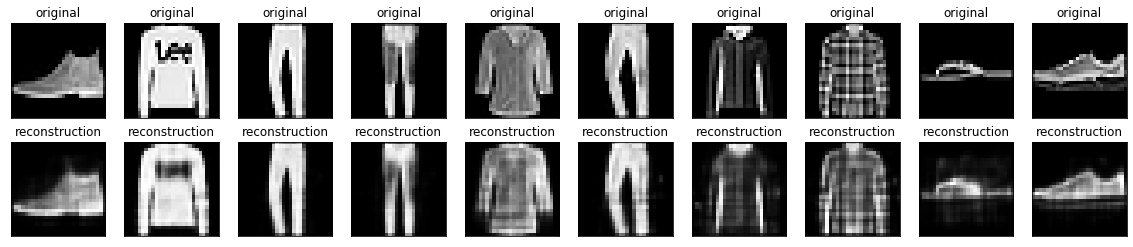

In [23]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("original")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("reconstruction")
plt.show()